# Estimates
> _<font color="grey">If you cannot see the HTML rendering (e.g. colors), view this notebook [here](https://nbviewer.jupyter.org/github/Mipanox/ME303/blob/master/others/estimates.ipynb)</font>_

Some justification of the assumptions and estimates of the numbers.

In [40]:
import numpy as np
import pandas as pd
from astropy import units as u
from astropy import constants as c
import matplotlib.pyplot as plt
%matplotlib inline

## some settings for plotting display
plt.rcParams['figure.figsize'] = (18,12)
plt.rcParams['axes.titlesize'] = 28
plt.rcParams['axes.labelsize'] = 24
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['legend.fontsize'] = 20
plt.rc('text', usetex=True)

In [19]:
## read in data
avo_ss = ['avo_rw_df','avo_hd_df','avo_to_df','avo_ne_df','avo_ta_df','avo_lw_df','avo_ro_df']
sho_ss = ['sho_rw_df','sho_hd_df','sho_to_df','sho_ne_df','sho_ta_df','sho_lw_df','sho_ro_df']

for name in avo_ss:
    vars()[name] = pd.read_csv('../kinematics/tpva_data/%s.csv' %name)
for name in sho_ss:
    vars()[name] = pd.read_csv('../kinematics/tpva_data/%s.csv' %name)    

In [92]:
## dataframes for extracted parameters
avo_df = pd.DataFrame()
sho_df = pd.DataFrame()

---
## <font color="blue">Kinematics/Dimension Estimates</font>
### <font color="green">Body Motions</font>
Since the y-velocities are essentially zero (relative to x-velocities), we can use this fact to "normalize" the aerodynamic forces such that the lift cancels the weight:

_(The "peak" for Avocet is the tilting of the body. I suspect the center of gravity remains intact)_

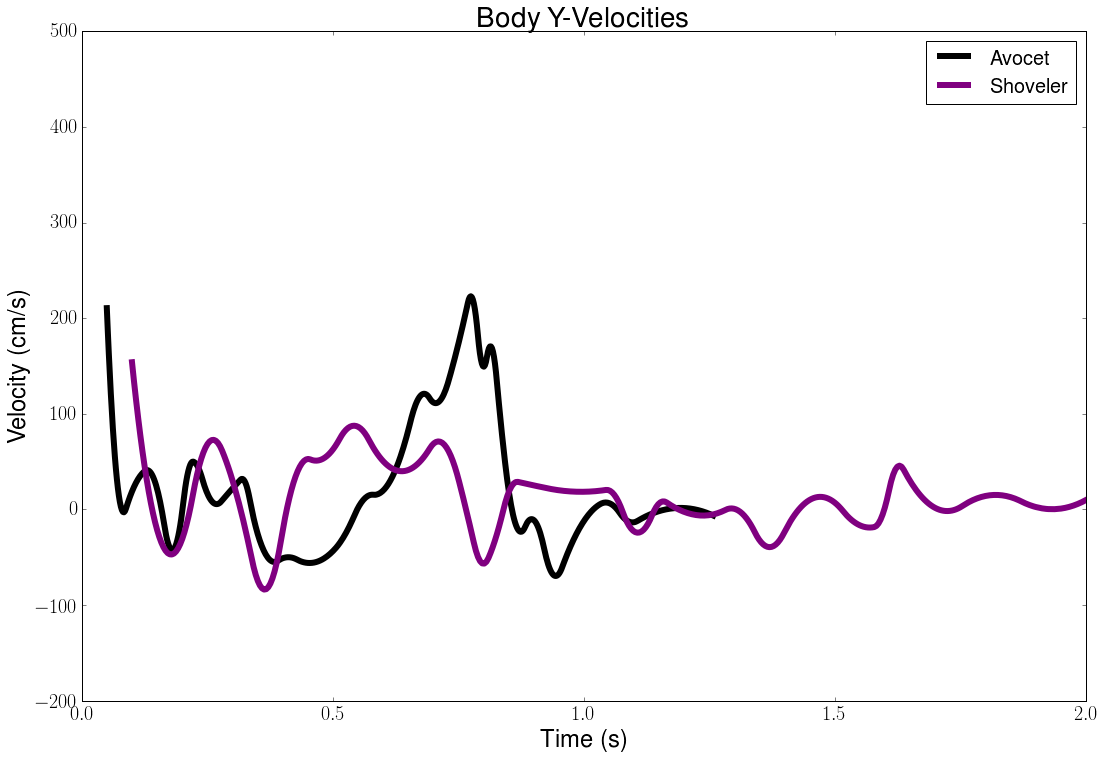

In [61]:
plt.plot(avo_ne_df['t'],avo_ne_df['vy'],c='k',lw=6,label='Avocet')
plt.plot(sho_ne_df['t'],sho_ne_df['vy'],c='purple',lw=6,label='Shoveler')
plt.title('Body Y-Velocities'); plt.xlabel('Time (s)'); plt.ylabel('Velocity (cm/s)')
plt.ylim(-200,500)
plt.legend()

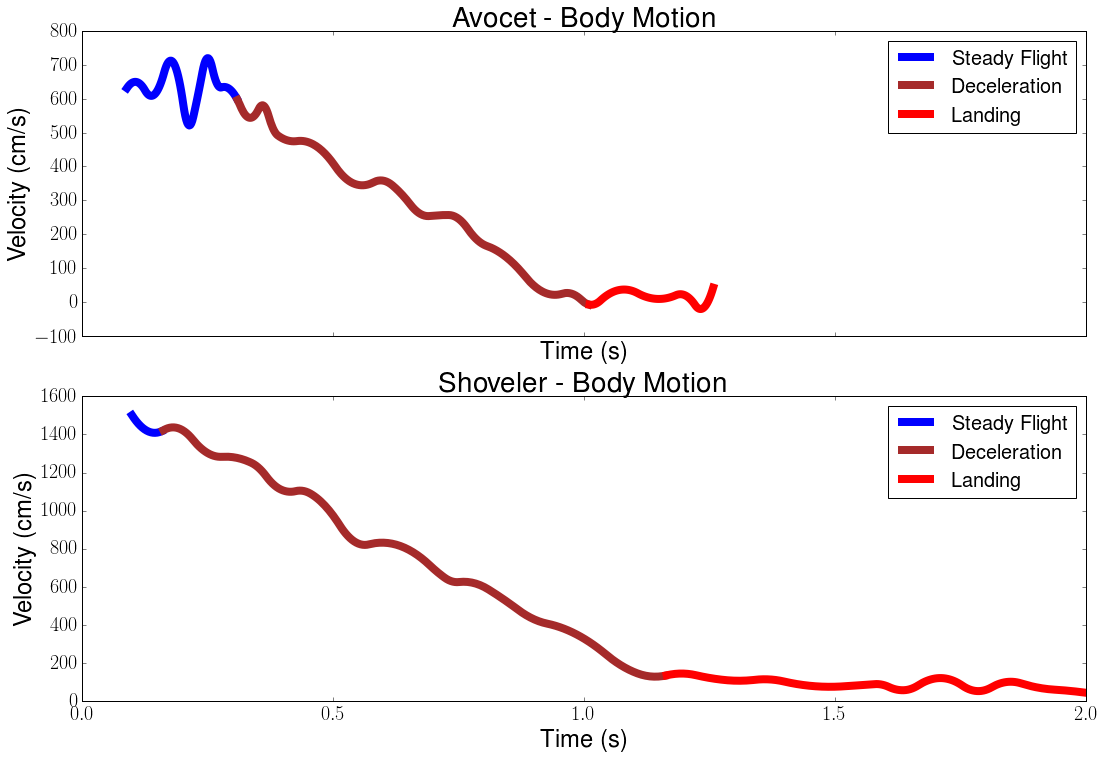

In [100]:
fig, ax = plt.subplots(2, 1, sharex=True)

t0_a,t1_a,t2_a = 20,130,480
ax[0].plot(avo_ne_df['t'][t0_a:t1_a],avo_ne_df['vx'][t0_a:t1_a],c='blue',lw=8,label='Steady Flight')
ax[0].plot(avo_ne_df['t'][t1_a:t2_a],avo_ne_df['vx'][t1_a:t2_a],c='brown',lw=8,label='Deceleration')
ax[0].plot(avo_ne_df['t'][t2_a:],avo_ne_df['vx'][t2_a:],c='red',lw=8,label='Landing')
ax[0].set_title('Avocet - Body Motion'); ax[0].set_xlabel('Time (s)'); ax[0].set_ylabel('Velocity (cm/s)')
ax[0].legend()

avo_b_sf_v = np.mean(avo_ne_df['vx'][t0_a:t1_a])
avo_b_de_v = np.mean(avo_ne_df['vx'][t1_a:t2_a])
avo_b_ld_v = np.mean(avo_ne_df['vx'][t2_a:])

t1_s,t2_s = 15,255
ax[1].plot(sho_ne_df['t'][:t1_s],sho_ne_df['vx'][:t1_s],c='blue',lw=8,label='Steady Flight')
ax[1].plot(sho_ne_df['t'][t1_s:t2_s],sho_ne_df['vx'][t1_s:t2_s],c='brown',lw=8,label='Deceleration')
ax[1].plot(sho_ne_df['t'][t2_s:],sho_ne_df['vx'][t2_s:],c='red',lw=8,label='Landing')
ax[1].set_title('Shoveler - Body Motion'); ax[1].set_xlabel('Time (s)'); ax[1].set_ylabel('Velocity (cm/s)')
ax[1].legend()

sho_b_sf_v = np.mean(sho_ne_df['vx'][:t1_s])
sho_b_de_v = np.mean(sho_ne_df['vx'][t1_s:t2_s])
sho_b_ld_v = np.mean(sho_ne_df['vx'][t2_s:])

From the division into three phases (note that the avocet's landing phase and the shoveler's steady flight phases will not be discussed), it is tempting to use a straight line to describe the deceleration phase. Other two can be treated as exhibiting constant velocities.

The (mean) velocities are:

In [71]:
print 'Avocet   mean velocities - steady flight:  {0:.0f}, decel.: {1:.0f}, landing: {2:.0f} (cm/s)'.format(avo_b_sf_v,avo_b_de_v,avo_b_ld_v)
print 'Shoveler mean velocities - steady flight: {0:.0f}, decel.: {1:.0f}, landing: {2:.0f} (cm/s)'.format(sho_b_sf_v,sho_b_de_v,sho_b_ld_v)

Avocet   mean velocities - steady flight:  638, decel.: 284, landing: 13 (cm/s)
Shoveler mean velocities - steady flight: 1435, decel.: 765, landing: 90 (cm/s)


In [93]:
### store in dataframe...
avo_df['vx_sf'],avo_df['vx_de'],avo_df['vx_ld']=np.array([avo_b_sf_v]),np.array([avo_b_de_v]),np.array([avo_b_ld_v])
sho_df['vx_sf'],sho_df['vx_de'],sho_df['vx_ld']=np.array([sho_b_sf_v]),np.array([sho_b_de_v]),np.array([sho_b_ld_v])

### <font color="green">Wing Motions</font>
Due to the lack of data in the steady flight phase for the shoveler, here only avocet data is presented. And as usual, the two species are considered the same.

In [116]:
exec(open('../codes/fit_sine.py').read())

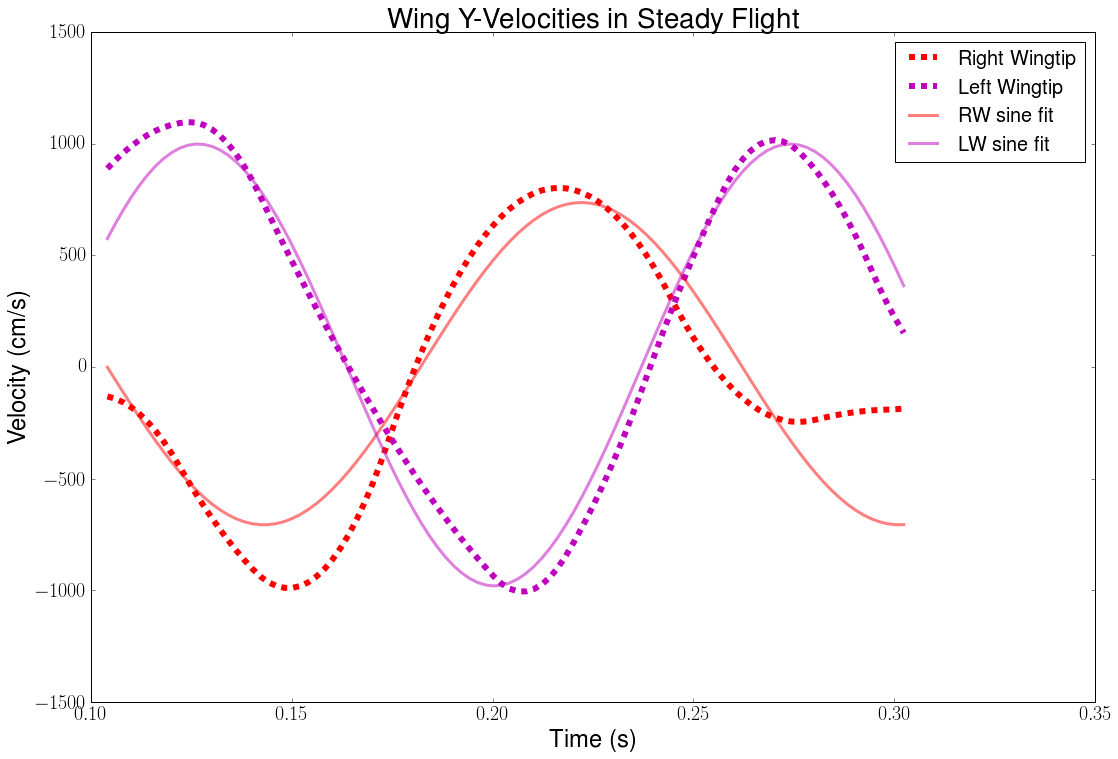

In [122]:
### because the time ranges are different, we have to match the indices in 'time'
t0_a,t1_a = 0,100
tt = avo_rw_df['t'][t0_a:t1_a]
rw = avo_rw_df['vy'][t0_a:t1_a]
lw = avo_lw_df['vy'][t0_a:t1_a]

plt.plot(tt,rw,'r--',lw=6,label='Right Wingtip')
plt.plot(tt,lw,'m--',lw=6,label='Left Wingtip')
plt.title('Wing Y-Velocities in Steady Flight'); plt.xlabel('Time (s)'); plt.ylabel('Velocity (cm/s)')

### eye-fit a sine wave...
guesses = [700.,6/0.25,0.1,0.]
rwfit = fit_sine(tt,rw,guesses)
lwfit = fit_sine(tt,lw,guesses)

plt.plot(tt,rwfit[0],c='r',lw=3,alpha=0.5,label='RW sine fit')
plt.plot(tt,lwfit[0],c='m',lw=3,alpha=0.5,label='LW sine fit')
plt.legend()

and the best-fit parameters are

In [130]:
print 'RW - Amplitude: {0:.0f} (cm), Frequency: {1:.1f} (Hz)'.format(abs(rwfit[1][0]),rwfit[1][1]/2/np.pi)
print 'LW - Amplitude: {0:.0f} (cm), Frequency: {1:.1f} (Hz)'.format(abs(lwfit[1][0]),lwfit[1][1]/2/np.pi)

RW - Amplitude: 722 (cm), Frequency: 6.3 (Hz)
LW - Amplitude: 990 (cm), Frequency: 6.8 (Hz)


In [131]:
### store in dataframe...take average, same for two birds...
avo_df['w_a'],avo_df['w_f']=np.array([abs((rwfit[1][0]+lwfit[1][0])/2)]),np.array([(rwfit[1][1]+lwfit[1][1])/4/np.pi])
sho_df['w_a'],sho_df['w_f']=np.array([abs((rwfit[1][0]+lwfit[1][0])/2)]),np.array([(rwfit[1][1]+lwfit[1][1])/4/np.pi])

### <font color="green">Foot</font>

---
## <font color="blue">Assumption Justification</font>
### <font color="green">Wing</font>
#### <font color="red">Shape</font>

#### <font color="red">Harmonicity</font>

### <font color="green">Foot</font>
#### <font color="red">Velocity Coefficient</font>

#### <font color="red">Small Trim Angle</font>

#### <font color="red">Laminar Boundary Layer</font>

### <font color="green">Body</font>
#### <font color="red">Neglible Aerodynamics</font>

#### <font color="red">Torque Balance</font>
Avocet, no need to discuss torque...
shoveler snapshot: force equal but opposite direction -> "normalizing" one to another! alternatively, use y-balance

In [25]:
## Flat plate planning (Savitsky 1964, Eqn (15))
v_s = 1. * u.m/u.s # est. skiing speed
b   = 7. * u.cm # 'beam' : width of foot
lba = 1.5 # chord/beam aspect ratio
chd = lba * b # chord length

C_v = (v_s/np.sqrt(c.g0*b)).to(u.dimensionless_unscaled)
Re_foot = (v_s*chd/nu_w).to(u.dimensionless_unscaled)

In [26]:
print C_v, Re_foot

1.20695378831 105000.0


In [14]:
## boat parameters for check
nu_w = 1e-6 * u.m**2/u.s # SI, kinematic viscosity
v_bt = 10. * u.m/u.s
L_bt = 20. * u.m

Re_bt = (v_bt*L_bt/nu_w).to(u.dimensionless_unscaled)

### Manson Table 9.3 (Schlichting 2000)
C_Dl_bt = 1.328 / (Re_bt)**0.5 # laminar
C_Dt_bt = 0.455 / np.log10(Re_bt)**2.58 # turbulent, smooth plate
C_Ds_bt = 0.075 / (np.log10(Re_bt)-2)**2 # corrected Schoenherr formula (Granville 1977)

In [15]:
print Re_bt, C_Dl_bt, C_Dt_bt, C_Ds_bt

200000000.0 9.39037805416e-05 0.00193486594168 0.00188902701705


The Re is consistent (on magnitude-of-order) with the "extreme" ship from [wikipedia](https://en.wikipedia.org/wiki/Reynolds_number)
<br><br>
The last two agree quite well. We shall adopt one of the formulae for our "foot plate"

In [24]:
## Onset of turbulent boundary layer
Re_cri = 5e5 # (transition critical Re from Manson)

In [23]:
### transition length
print (Re_cri*nu_w/v_s).to(u.cm)

50.0 cm


Apparently the feet are within laminar boundary layer regime. Therefore we shall use the first equation for C_D